<a href="https://colab.research.google.com/github/RahmatullahRony/Mushroom-Donate/blob/main/Mushroom-classification(Lab1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
pip install ucimlrepo

In [ ]:
# Fetch the mushroom dataset
from ucimlrepo import fetch_ucirepo
mushroom = fetch_ucirepo(id=73)

In [ ]:
# Convert data to pandas dataframe
X = mushroom.data.features
y = mushroom.data.targets
df = pd.concat([X, y], axis=1)

# Check the shape
print(df.shape)
# Display the first few rows of the dataset
print(X.head())
print(y.head())




(8124, 23)
  cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing  \
0         x           s         n       t    p               f            c   
1         x           s         y       t    a               f            c   
2         b           s         w       t    l               f            c   
3         x           y         w       t    p               f            c   
4         x           s         g       f    n               f            w   

  gill-size gill-color stalk-shape  ... stalk-surface-below-ring  \
0         n          k           e  ...                        s   
1         b          k           e  ...                        s   
2         b          n           e  ...                        s   
3         n          n           e  ...                        s   
4         b          k           t  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w         

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

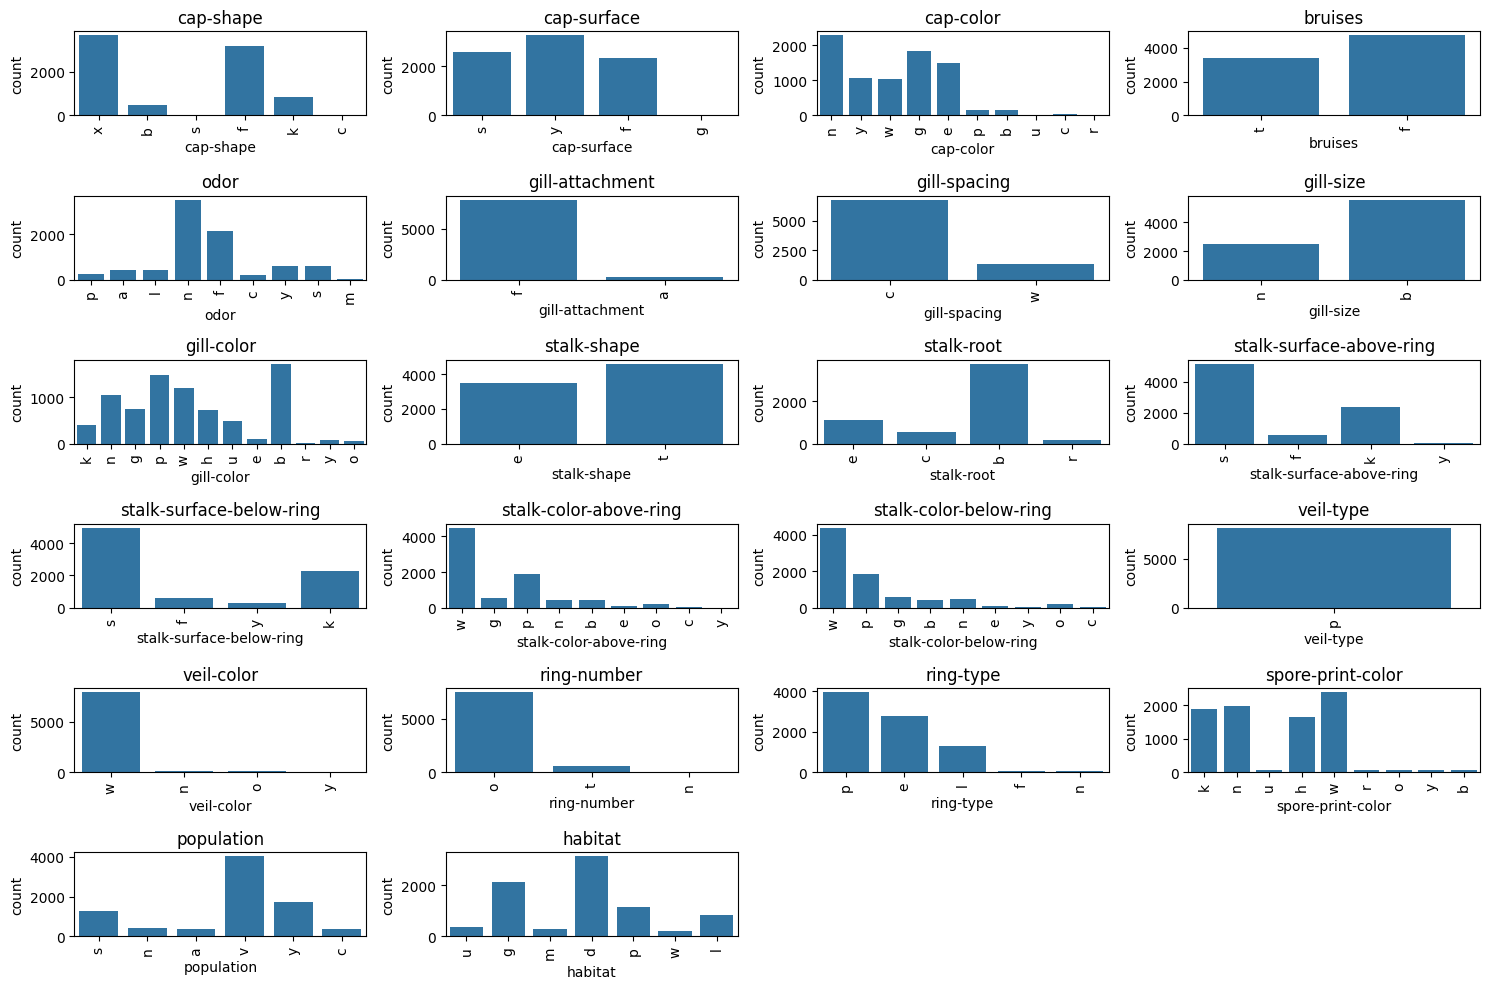

In [ ]:
# Display basic information about the dataset
print(X.info())

# Display summary statistics
print(X.describe())

# Check for missing values
print(X.isnull().sum())

# Display the distribution of the target variable
print(y.value_counts())

# Plotting the distribution of each feature
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the plots
plt.figure(figsize=(15, 10))

# Plot the distribution of each feature
for i, column in enumerate(X.columns, 1):
    plt.subplot(6, 4, i)
    sns.countplot(x=X[column])
    plt.title(column)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


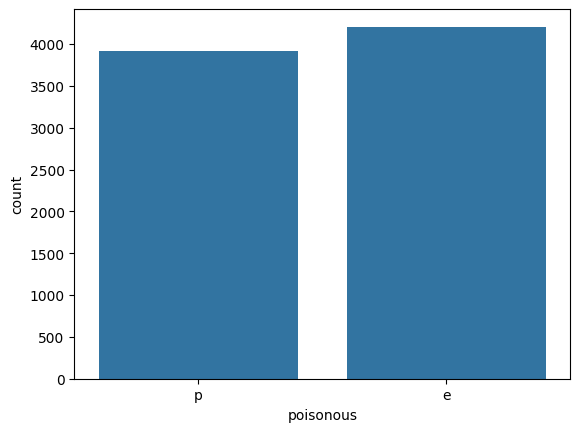

In [ ]:
sns.countplot(x=df['poisonous'])

plt.show()


<Figure size 1400x600 with 0 Axes>

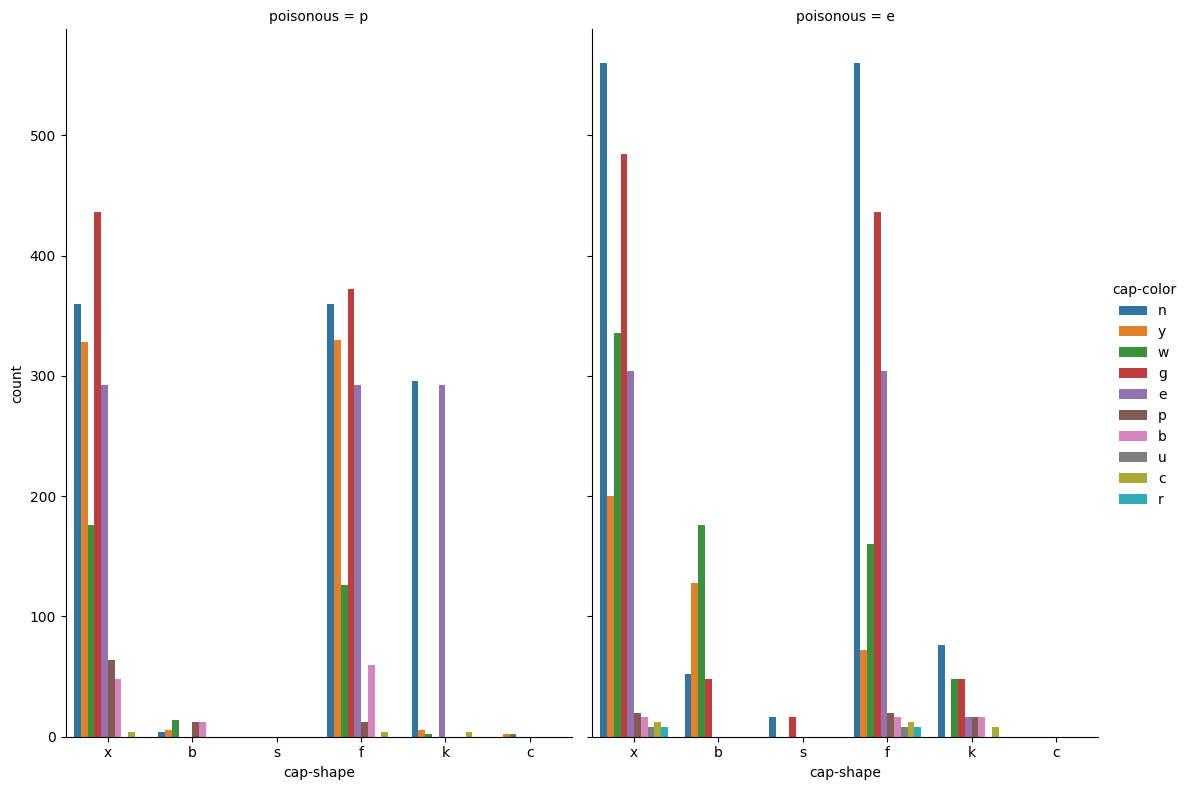

In [ ]:
plt.figure(figsize = (14,6))
g = sns.catplot(x="cap-shape", hue="cap-color", col="poisonous",
             data=df, kind="count",
             height=8, aspect=.7);

<Figure size 1400x600 with 0 Axes>

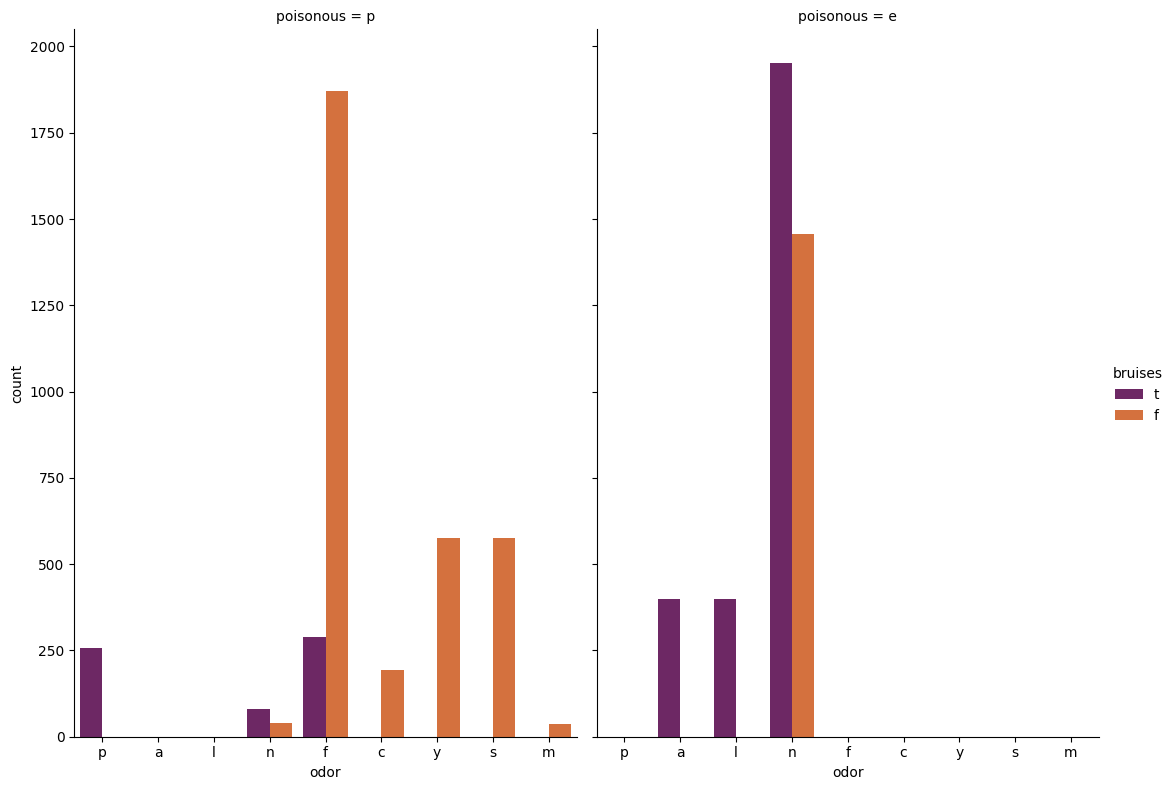

In [ ]:
plt.figure(figsize = (14,6))
g = sns.catplot(x="odor", hue="bruises", col="poisonous",
             data=df, kind="count",
             height=8, aspect=.7 ,palette ='inferno' );

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = df.apply(LabelEncoder().fit_transform)
df.head()


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,5,2,4,1,6,1,0,1,4,0,...,7,7,0,2,1,4,2,3,5,1
1,5,2,9,1,0,1,0,0,4,0,...,7,7,0,2,1,4,3,2,1,0
2,0,2,8,1,3,1,0,0,5,0,...,7,7,0,2,1,4,3,2,3,0
3,5,3,8,1,6,1,0,1,5,0,...,7,7,0,2,1,4,2,3,5,1
4,5,2,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,0,1,0


In [ ]:
x = df.drop(['poisonous'], axis=1)
y = df['poisonous']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0, max_depth=5)
dt.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=0)

In [ ]:
dt.score(x_train, y_train)

0.9778403095321843

In [ ]:
predictions = dt.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9827727645611156

In [1]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0, max_depth=5)


In [ ]:
rf.fit(x_train, y_train)
rf.score(x_train, y_train)

0.9915582131551178

In [ ]:
predictions = rf.predict(x_test)
rf.score(x_test, y_test)

0.9917965545529123

In [ ]:
accuracy_score(y_test, predictions)

0.9917965545529123

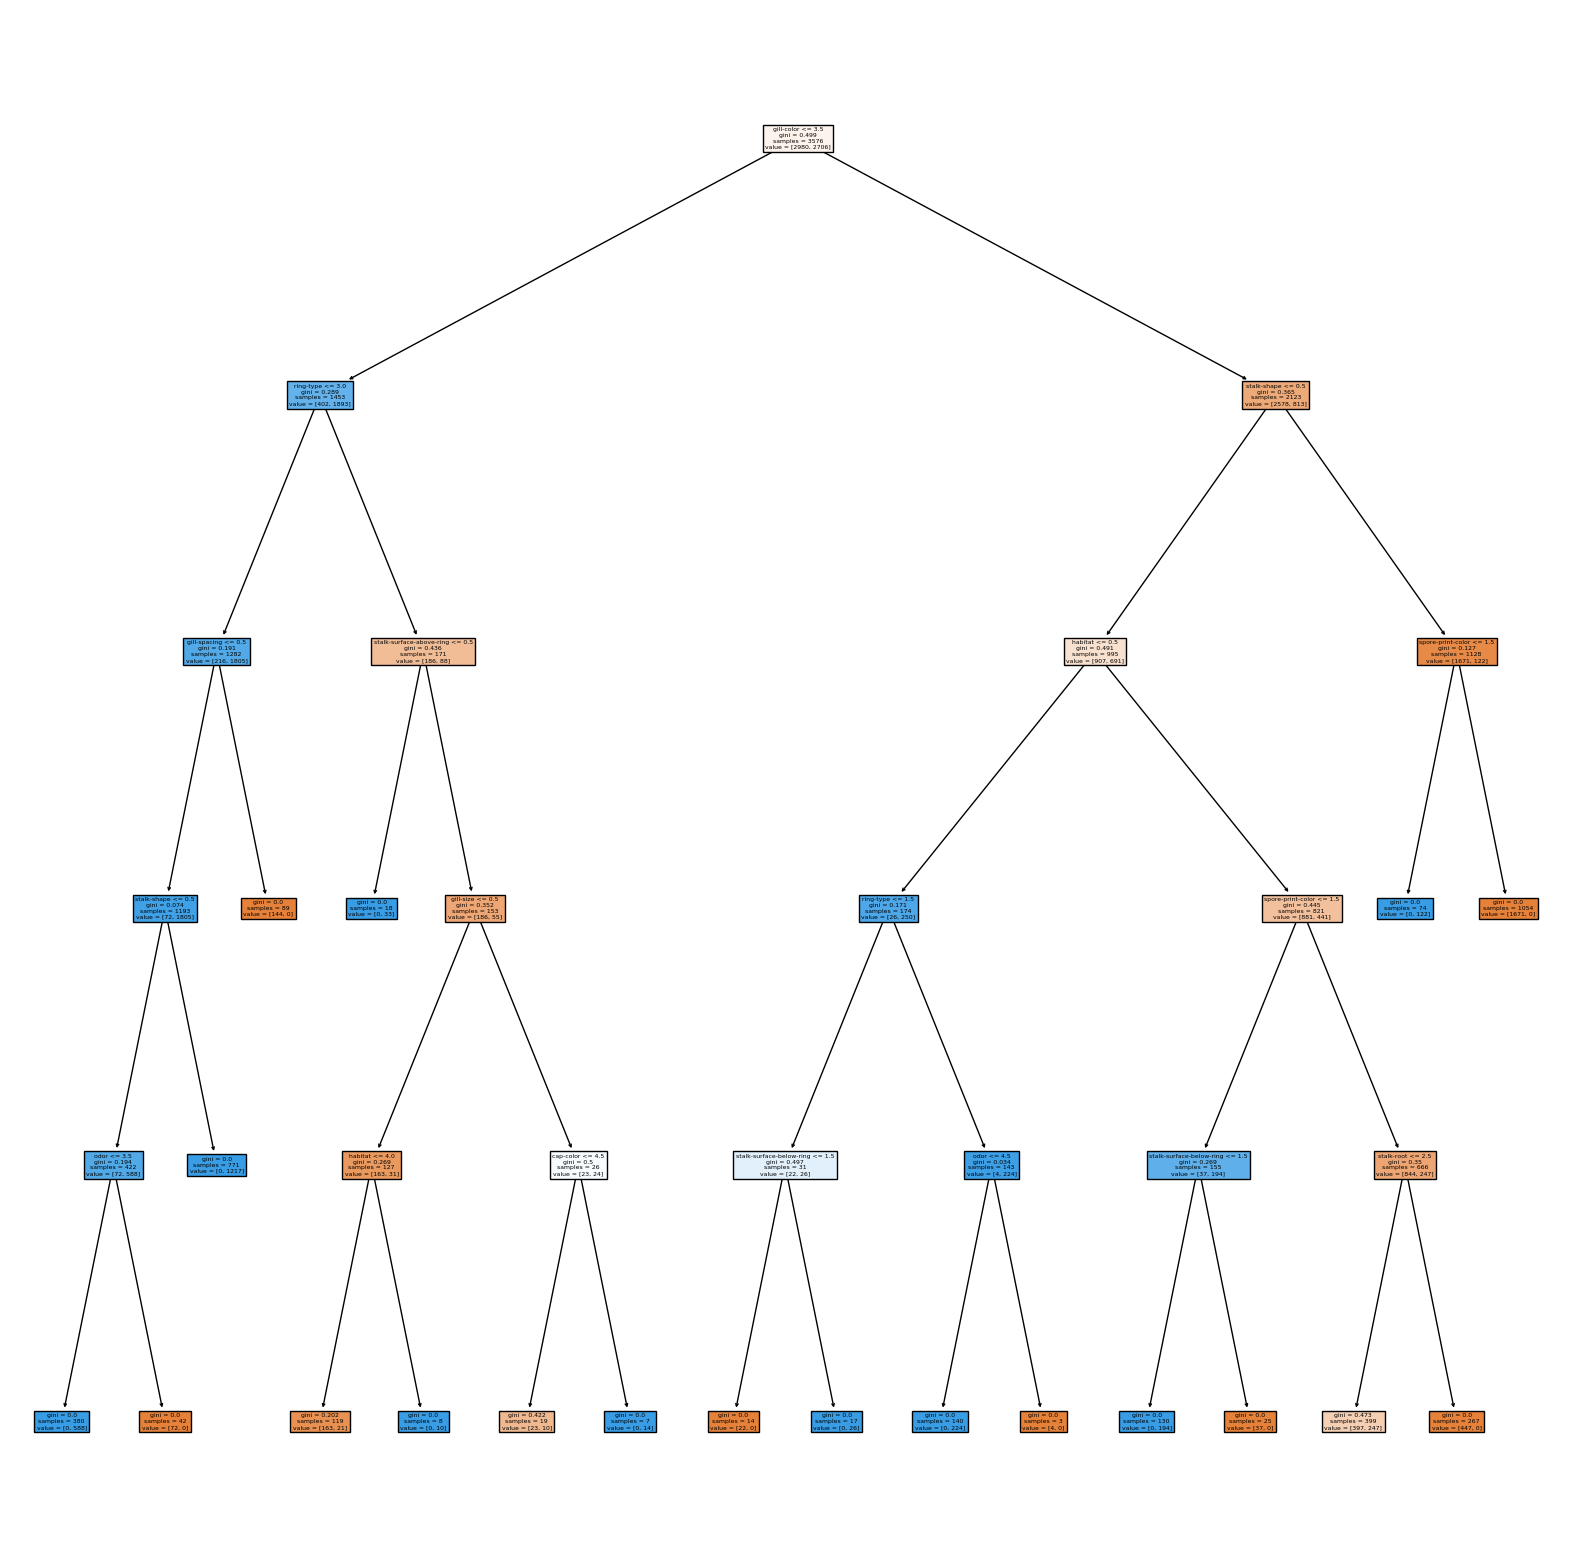

In [ ]:
from sklearn import tree
plt.figure(figsize=(20, 20))
_ = tree.plot_tree(rf.estimators_[0], feature_names=X.columns, filled=True)
plt.show()

Inference
1 Decision Tree Accuracy - 98.3%
2 Random Forest Accuracy - 99%

Hence, Random Forest is comparatively better